In [1]:
# setup
from mlwpy import *
%matplotlib inline

In [2]:
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, 
                       columns=iris.feature_names)
iris_df['target'] = iris.target
display(pd.concat([iris_df.head(3),
                   iris_df.tail(3)]))

sepal length (cm)     sepal width (cm)    petal length (cm)  \
0                 5.1000               3.5000               1.4000   
1                 4.9000               3.0000               1.4000   
2                 4.7000               3.2000               1.3000   
147               6.5000               3.0000               5.2000   
148               6.2000               3.4000               5.4000   
149               5.9000               3.0000               5.1000   

        petal width (cm)  target  
0                 0.2000       0  
1                 0.2000       0  
2                 0.2000       0  
147               2.0000       2  
148               2.3000       2  
149               1.8000       2

D:\Programs\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programs\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


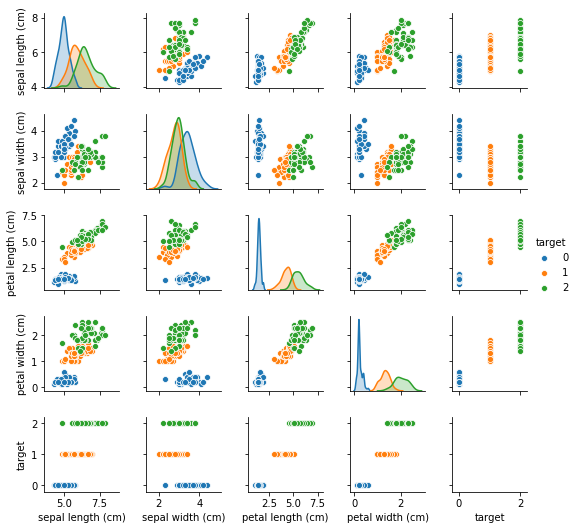

In [3]:
sns.pairplot(iris_df, hue='target', height=1.5);

In [4]:
print('targets: {}'.format(iris.target_names),
      iris.target_names[0], sep="\n")

targets: ['setosa' 'versicolor' 'virginica']
setosa


In [5]:
# simple train/test split
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = skms.train_test_split(iris.data,
                                                         iris.target, 
                                                         test_size=.25)
print("Train features shape:", iris_train_ftrs.shape)
print("Test features shape:",  iris_test_ftrs.shape)

Train features shape: (112, 4)
Test features shape: (38, 4)


In [6]:
answer_key = np.array([True, True, False, True])
student_answers = np.array([True, True, True, True]) # desperate student!

In [7]:
correct = answer_key == student_answers
num_correct = correct.sum() # True == 1, add them up
print("manual accuracy:", num_correct / len(answer_key))

manual accuracy: 0.75


In [8]:
print("sklearn accuracy:", 
      metrics.accuracy_score(answer_key, 
                             student_answers))

sklearn accuracy: 0.75


In [9]:
# default n_neighbors = 5
knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

# evaluate our predictions against the held-back testing targets
print("3NN accuracy:", 
      metrics.accuracy_score(iris_test_tgt, preds))

3NN accuracy: 1.0


In [10]:
nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

print("NB accuracy:", 
      metrics.accuracy_score(iris_test_tgt, preds))

NB accuracy: 1.0


In [11]:
# stand alone code
from sklearn import (datasets, metrics, 
                     model_selection as skms,
                     naive_bayes, neighbors)

# we set random_state so the results are reproducable
# otherwise, we get different training and testing sets
# more details in Chapter 5
iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data,
                                                        iris.target, 
                                                        test_size=.90,
                                                        random_state=42) 

models = {'kNN': neighbors.KNeighborsClassifier(n_neighbors=3),
          'NB' : naive_bayes.GaussianNB()}

for name, model in models.items():
    fit = model.fit(iris_train_ftrs, iris_train_tgt)
    predictions = fit.predict(iris_test_ftrs)
    
    score = metrics.accuracy_score(iris_test_tgt, predictions)
    print("{:>3s}: {:0.2f}".format(name,score))

kNN: 0.96
 NB: 0.81


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 42)

fit   = rf_clf.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

print("Random Forest accuracy:", 
      metrics.accuracy_score(iris_test_tgt, preds))

Random Forest accuracy: 0.9555555555555556


In [12]:
%timeit -r1 datasets.load_iris()

5.94 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [13]:
%%timeit -r1 -n1
(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = skms.train_test_split(iris.data,
                                                         iris.target, 
                                                         test_size=.25)

940 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [14]:
%%timeit -r1

nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

2.41 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [15]:
%%timeit -r1

knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

metrics.accuracy_score(iris_test_tgt, preds)

12.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [16]:
# fitting
nb = naive_bayes.GaussianNB()
%timeit -r1 fit   = nb.fit(iris_train_ftrs, iris_train_tgt)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
%timeit -r1 fit = knn.fit(iris_train_ftrs, iris_train_tgt)

1.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
647 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [17]:
# predicting
nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
%timeit -r1 preds = fit.predict(iris_test_ftrs)

457 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
11.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


In [18]:
!pip install memory_profiler

In [19]:
%load_ext memory_profiler

In [20]:
%%memit
nb    = naive_bayes.GaussianNB()
fit   = nb.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

peak memory: 166.71 MiB, increment: 0.04 MiB


In [21]:
%%memit
knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
fit   = knn.fit(iris_train_ftrs, iris_train_tgt)
preds = fit.predict(iris_test_ftrs)

peak memory: 166.71 MiB, increment: 0.00 MiB


In [22]:
!cat scripts/knn_memtest.py

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
!python scripts/knn_memtest.py

python: can't open file 'scripts/knn_memtest.py': [Errno 2] No such file or directory


In [24]:
import functools as ft
import memory_profiler
from mlwpy import *

def nb_go(train_ftrs, test_ftrs, train_tgt):
    nb    = naive_bayes.GaussianNB()
    fit   = nb.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)

def split_data(dataset):
    split = skms.train_test_split(dataset.data,
                                  dataset.target,
                                  test_size=.25)
    return split[:-1] # don't need test tgt

def msr_mem(go, args):
    base = memory_profiler.memory_usage()[0]
    mu = memory_profiler.memory_usage((go, args),
                                       max_usage=True)[0]
    print("{:<3}: ~{:.4f} MiB".format(go.__name__, mu-base))

if __name__ == "__main__":
    msr = msr_mem
    go = nb_go

    sd = split_data(datasets.load_iris())
    msr(go, sd)

TypeError: 'float' object is not subscriptable

In [ ]:
!cat scripts/perf_01.py

In [ ]:
!python scripts/perf_01.py mem nb
!python scripts/perf_01.py time nb

In [ ]:
!python scripts/perf_01.py mem knn
!python scripts/perf_01.py time knn